In [3]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from glob import glob

#folder_data = "/Odyssey/private/t22picar/data/ssh_L4/"
folder_data = "/Odyssey/public/data_challenge_ssh_ose/data/maps/NeurOST_SSH-SST_allsat-alg/"
#file_obs = "NeurOST_SSH_allsat-al_2019.nc" 
file_obs = "NeurOST_SSH-SST_allsat-al_2019.nc" 

list_of_maps = sorted(glob('/Odyssey/public/data_challenge_ssh_ose/data/maps/NeurOST_SSH_allsat-alg/NeurOST_SSH_allsat-alg_*_20240115.nc'))
#list_of_maps = sorted(glob(f'{folder_data}*.nc'))
#list_of_maps = "/Odyssey/private/t22picar/data/glorys_15m/glorys_15.81m_2019-01-01-2020-01-01.nc"
maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')
#maps = xr.open_dataset(folder_data+file_obs)

start_date = "2019-01-01"
end_date = "2019-12-31"
maps = maps.sel(time=slice(start_date, end_date))

In [4]:
maps

<xarray.Dataset> Size: 47GB
Dimensions:                 (latitude: 1500, longitude: 3600, time: 365)
Coordinates:
  * longitude               (longitude) float64 29kB 0.1 0.2 0.3 ... 359.9 360.0
  * latitude                (latitude) float64 12kB -70.0 -69.9 ... 79.8 79.9
  * time                    (time) datetime64[ns] 3kB 2019-01-01 ... 2019-12-31
    Lambert_Azimuthal_Grid  int32 4B -2147483647
Data variables:
    sla                     (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    adt                     (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    ugosa                   (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    vgosa                   (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    ugos                    (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    vgos                    (latitude, longitude, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>

In [5]:
maps.coords['longitude'] = (maps.coords['longitude'] + 180) % 360 - 180
#maps.coords['longitude'] = maps.coords['longitude'] - 180
maps = maps.sortby(maps.longitude)

maps = maps.rename({"latitude": "lat"})
maps = maps.rename({"longitude": "lon"})

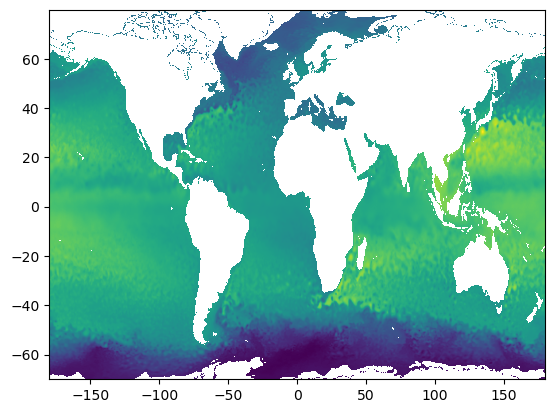

In [7]:
plt.pcolormesh(maps.lon,maps.lat,maps.adt[:,:,0])

In [8]:
adt = maps.adt.values[:,:,:]

In [9]:
folder_data_4th = "/Odyssey/private/t22picar/data/glorys_15m/"
file_glorys_4th = "glorys_15.81m_2019-01-01-2020-01-01_4th.nc"

maps_glo_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)


maps_glo_4th = maps_glo_4th.sel(time=slice(start_date, end_date))
#maps = maps.rename({"adt": "zos"})

# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=maps_glo_4th.lat.min(), stop=maps_glo_4th.lat.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=maps_glo_4th.lon.min(), stop=maps_glo_4th.lon.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da

new sizes: [680, 1440]


(array([4.53820023e-02, 1.26328190e-01, 1.48974710e-01, 1.20719134e-01,
        1.10370863e-01, 1.37971076e-01, 1.69021226e-01, 2.29961820e-01,
        2.43975135e-01, 3.15677288e-01, 6.32964956e-01, 8.34735915e-01,
        8.58076947e-01, 7.03858701e-01, 5.44556759e-01, 1.39240609e-01,
        4.20298649e-02, 6.83874728e-03, 1.15563393e-03, 1.54824276e-04]),
 array([-1.52667582, -1.34190106, -1.15712631, -0.97235155, -0.78757679,
        -0.60280204, -0.41802725, -0.23325248, -0.04847772,  0.13629705,
         0.3210718 ,  0.50584656,  0.69062132,  0.87539607,  1.06017089,
         1.24494565,  1.4297204 ,  1.61449516,  1.79926991,  1.98404467,
         2.16881943]),
 <BarContainer object of 20 artists>)

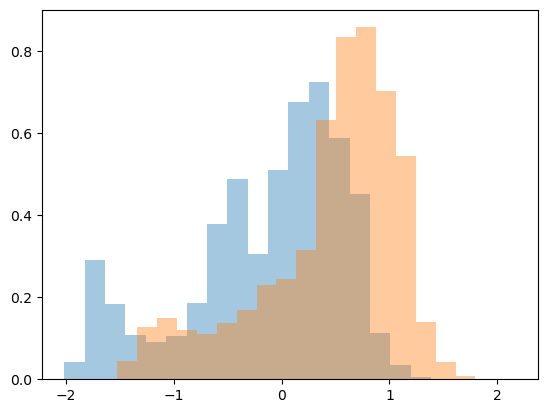

In [10]:
plt.hist(maps_glo_4th.zos.values.ravel(),20,alpha=0.4,density=True,label='glorys')
plt.hist(adt.ravel(),20,alpha=0.4,density=True,label='neurOST')

In [14]:
adt.shape

(1500, 3600, 365)

In [ ]:
#mean_glorys_ssh = np.nanmean(maps_glo_4th.zos.values)

#With 10y mdt
result_filepath = "/Odyssey/public/glorys/reanalysis/glorys12_2010_2019_mean_zos_4th.nc"
mdt = xr.open_dataset(result_filepath)
mdt = np.where(adt)
mean_glorys_ssh = np.nanmean(mdt.mean_zos.values)

mean_neurost_ssh = np.nanmean(adt)
offset = mean_glorys_ssh-mean_neurost_ssh

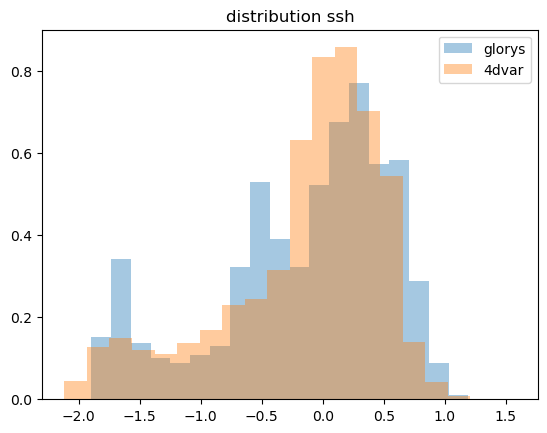

In [ ]:

#plt.hist(maps_glo_4th.zos.values.ravel(),20,alpha=0.4,density=True,label='glorys')

plt.hist(mdt.mean_zos.values.ravel(),20,alpha=0.4,density=True,label='glorys')
plt.hist(adt.ravel()+offset,20,alpha=0.4,density=True,label='obs')
plt.title("distribution ssh")
plt.legend()


In [68]:
maps = maps.rename({"adt": "zos"})
# Add offset due to different mdt
maps.zos.values = adt + offset

In [69]:
maps

<xarray.Dataset> Size: 47GB
Dimensions:                 (lat: 1500, lon: 3600, time: 365)
Coordinates:
  * lat                     (lat) float64 12kB -70.0 -69.9 -69.8 ... 79.8 79.9
  * time                    (time) datetime64[ns] 3kB 2019-01-01 ... 2019-12-31
    Lambert_Azimuthal_Grid  int32 4B -2147483647
  * lon                     (lon) float64 29kB -180.0 -179.9 ... 179.8 179.9
Data variables:
    sla                     (lat, lon, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    zos                     (lat, lon, time) float32 8GB nan nan nan ... nan nan
    ugosa                   (lat, lon, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    vgosa                   (lat, lon, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    ugos                    (lat, lon, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>
    vgos                    (lat, lon, time) float32 8GB dask.array<chunksize=(1500, 3600, 1), meta=np.ndarray>

(array([4.82704132e-02, 1.30218250e-01, 1.48623141e-01, 1.19337510e-01,
        1.11193487e-01, 1.39906168e-01, 1.74957021e-01, 2.33293080e-01,
        2.43861848e-01, 3.45554433e-01, 6.59675973e-01, 8.48420979e-01,
        8.44887103e-01, 6.90317436e-01, 4.85707574e-01, 1.12988464e-01,
        3.33288172e-02, 5.07287518e-03, 8.36355356e-04, 1.17807096e-04]),
 array([-2.09424376, -1.90825152, -1.72225928, -1.53626704, -1.3502748 ,
        -1.16428256, -0.97829038, -0.79229814, -0.60630596, -0.42031372,
        -0.23432148, -0.04832925,  0.13766298,  0.32365522,  0.50964743,
         0.69563967,  0.88163191,  1.06762409,  1.25361633,  1.43960857,
         1.62560081]),
 <BarContainer object of 20 artists>)

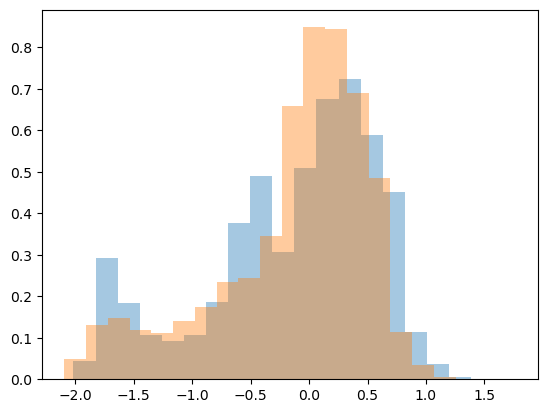

In [70]:
plt.hist(maps_glo_4th.zos.values.ravel(),20,alpha=0.4,density=True,label='glorys')
plt.hist(maps.zos.values.ravel(),20,alpha=0.4,density=True,label='sat')

In [71]:
# Interpolation new grid
maps_4th = regrid_da(new_sizes,maps)

In [72]:
maps_4th = maps_4th.transpose('time','lat','lon')

In [73]:
maps_4th

<xarray.Dataset> Size: 10GB
Dimensions:                 (lat: 680, lon: 1440, time: 365)
Coordinates:
  * time                    (time) datetime64[ns] 3kB 2019-01-01 ... 2019-12-31
    Lambert_Azimuthal_Grid  int32 4B -2147483647
  * lat                     (lat) float64 5kB -80.0 -79.75 -79.5 ... 89.75 90.0
  * lon                     (lon) float64 12kB -180.0 -179.7 ... 179.7 179.9
Data variables:
    sla                     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    zos                     (time, lat, lon) float64 3GB nan nan nan ... nan nan
    ugosa                   (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    vgosa                   (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    ugos                    (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    vgos                    (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>

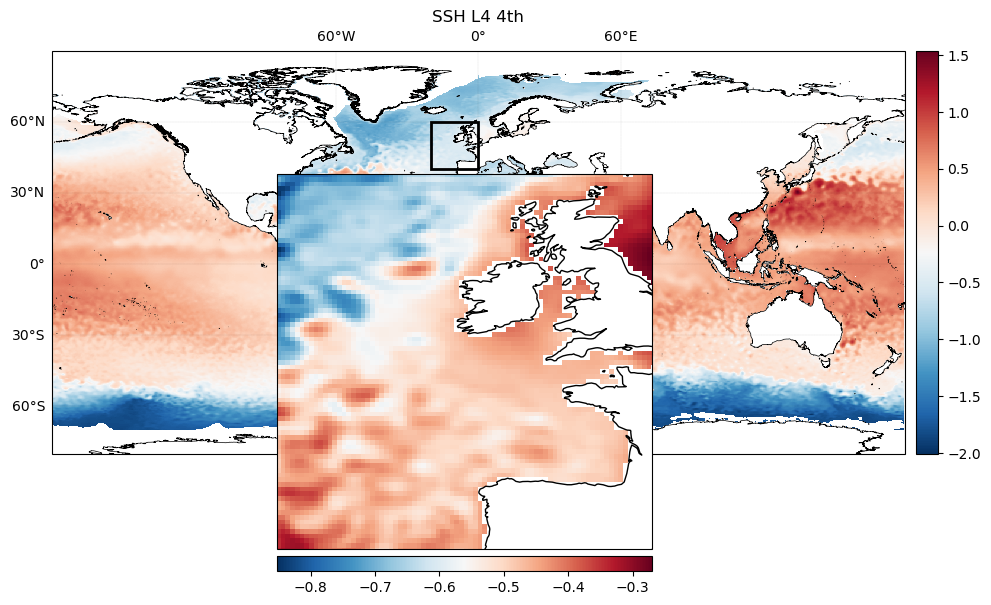

In [74]:
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_map_zoom

plot_map_zoom(maps_4th.zos[0],maps_4th.lon,maps_4th.lat,title="SSH L4 4th")

In [76]:
maps_4th

<xarray.Dataset> Size: 10GB
Dimensions:                 (lat: 680, lon: 1440, time: 365)
Coordinates:
  * time                    (time) datetime64[ns] 3kB 2019-01-01 ... 2019-12-31
    Lambert_Azimuthal_Grid  int32 4B -2147483647
  * lat                     (lat) float64 5kB -80.0 -79.75 -79.5 ... 89.75 90.0
  * lon                     (lon) float64 12kB -180.0 -179.7 ... 179.7 179.9
Data variables:
    sla                     (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    zos                     (time, lat, lon) float64 3GB nan nan nan ... nan nan
    ugosa                   (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    vgosa                   (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    ugos                    (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>
    vgos                    (time, lat, lon) float32 1GB dask.array<chunksize=(1, 680, 1440), meta=np.ndarray>

In [77]:
maps_4th = maps_4th.drop_vars("ugos").drop_vars("vgos").drop_vars("ugosa").drop_vars("vgosa").drop_vars("sla")

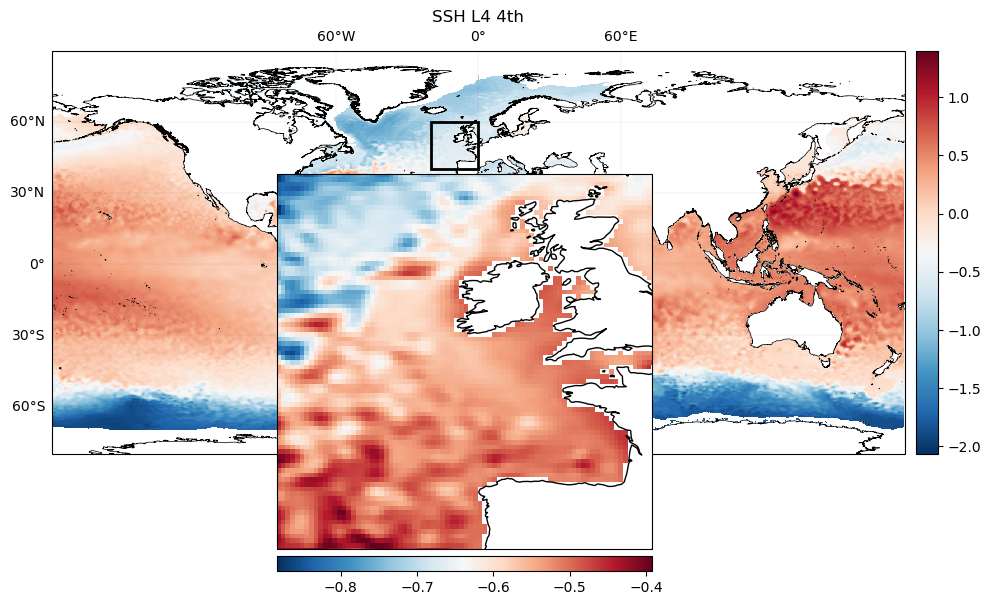

In [80]:
plot_map_zoom(maps_4th.zos[100],maps_4th.lon,maps_4th.lat,title="SSH L4 4th")


In [81]:
# save data 
file_obs = "NeurOST_SSH-SST_allsat-al_2019.nc" 
save_file=file_obs[:-3]+"_4th"+".nc"
# Sauvegarder le DataArray en fichier NetCDF
maps_4th.to_netcdf(folder_data+save_file)


In [4]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

folder_data = "/Odyssey/private/t22picar/data/ssh_L4/"
file_glorys = "SSH_L4_CMEMS_2019_4th.nc" # Actually not glorys 

maps_sst = xr.open_dataset(folder_data+file_glorys)
lat_simu = maps_sst.lat.values
lon_simu = maps_sst.lon.values

folder_data_4th = "/Odyssey/private/t22picar/data/glorys_2020_15m/"
file_glorys_4th = "glorys_15.81m_2020-01-20-2021-04-20_4th.nc"
maps_glo = xr.open_dataset(folder_data_4th+file_glorys_4th)

In [ ]:
maps_glo.lat

<xarray.DataArray 'lat' (lat: 680)> Size: 5kB
array([-80.      , -79.749632, -79.499264, ...,  89.499264,  89.749632,
        90.      ])
Coordinates:
    depth    float32 4B ...
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
Attributes:
    unit_long:      Degrees North
    axis:           Y
    units:          degrees_north
    standard_name:  latitude
    long_name:      Latitude

In [7]:
lon_simu

array([-179.9375    , -179.68741313, -179.43732627, ...,  179.43732627,
        179.68741313,  179.9375    ])